In [1]:
# plot merged_df from clustering


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pickle

import sys
import os
sys.path.append('../..')
from src.utils.directories import get_parent_directory
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
parent_dir = get_parent_directory()
all_pkl_path = (os.path.join(parent_dir, "data/processed/ml_ready/merged_arctic.pkl"))

with open(all_pkl_path, 'rb') as f:
    data = pickle.load(f)

In [3]:
merged_df = pd.read_pickle(os.path.join(parent_dir,'data/processed/clustering_output/arctic_spectral3_nosin.pkl'))

In [5]:

# Define the number of desired samples per degree of latitude
samples_per_degree = 1

subsampled_df = merged_df.groupby(['latitude', 'longitude']).apply(lambda x: x.sample(samples_per_degree) if len(x) >= samples_per_degree else x)

# Reset the index to remove the hierarchical index
subsampled_df.reset_index(drop=True, inplace=True)

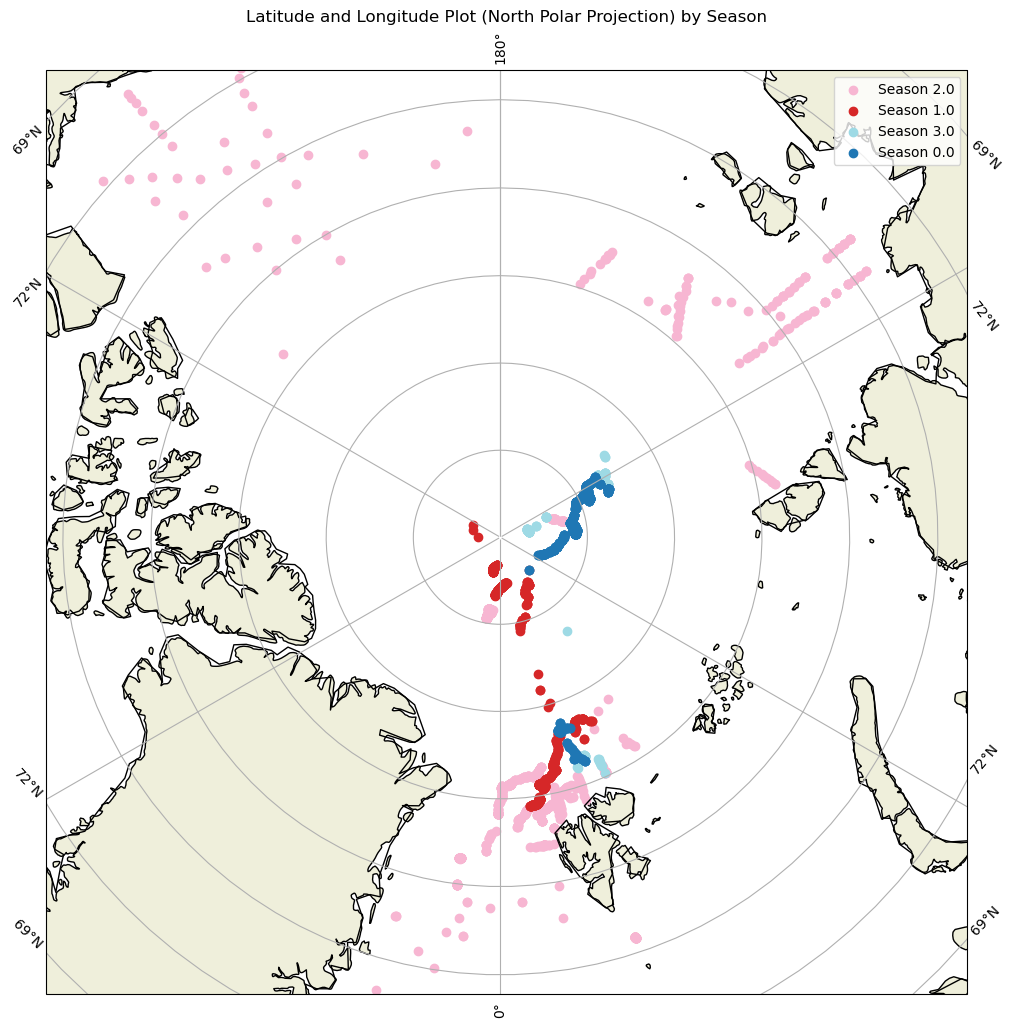

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D

# Create a figure and axes using the polar stereographic projection
projection = ccrs.NorthPolarStereo(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': projection})

# Get unique season labels from the 'Season' column
season_labels = subsampled_df['season'].unique()

# Define a colormap for the seasons
colormap = plt.cm.get_cmap('tab20', len(season_labels))

# Plot longitude and latitude from subsampled_df with colors based on seasons
for label in season_labels:
    season_data = subsampled_df[subsampled_df['season'] == label]
    ax.scatter(season_data['longitude'], season_data['latitude'], 
               transform=ccrs.PlateCarree(), label=f'Season {label}', c=[colormap(label/len(season_labels))])

# Add grid lines and tick markers with longitude and latitude values
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             x_inline=False, y_inline=False)
ax.set_extent([-180, 180, 74, 90], ccrs.PlateCarree())

# Add map features
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Customize the plot
ax.set_title('Latitude and Longitude Plot (North Polar Projection) by Season')
ax.legend(loc='upper right')

# Show the plot
plt.show()


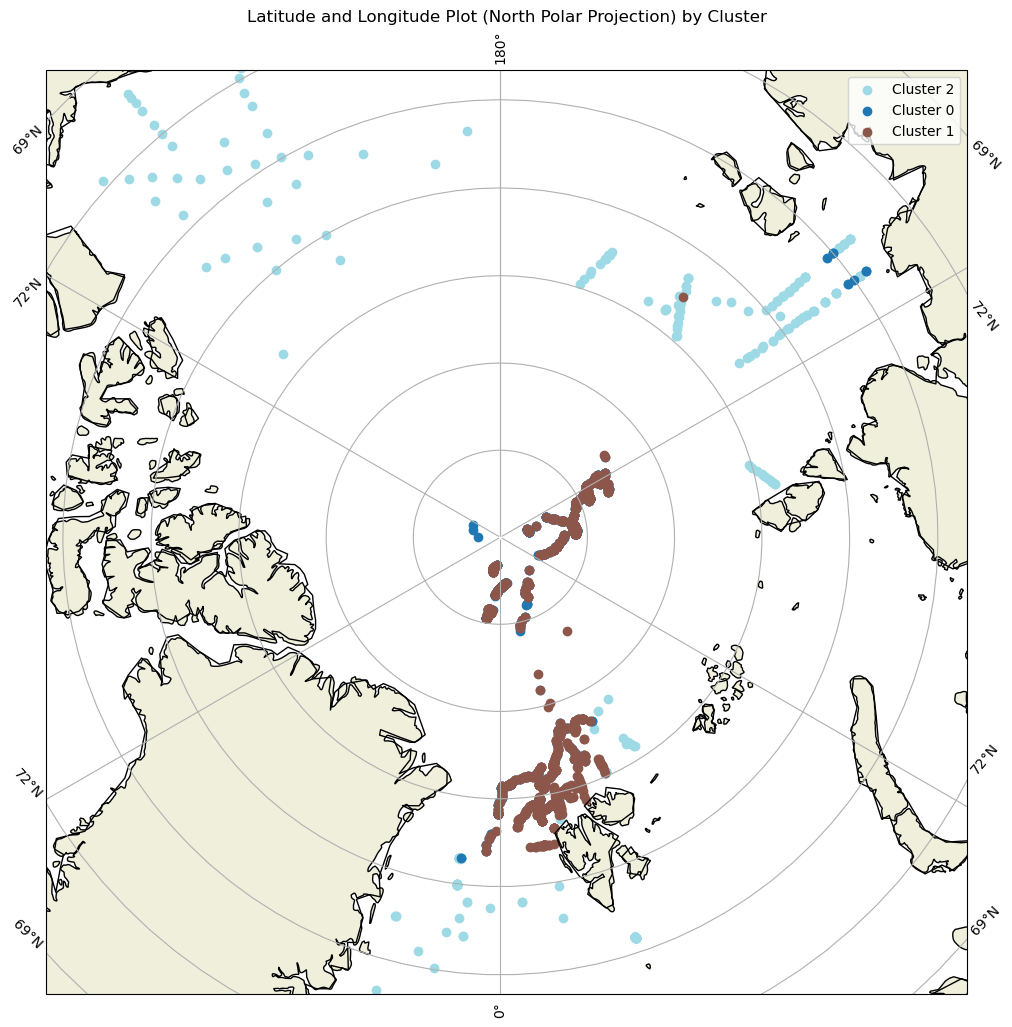

In [28]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D

# Create a figure and axes using the polar stereographic projection
projection = ccrs.NorthPolarStereo(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': projection})

# Get unique cluster labels from the 'Cluster' column
cluster_labels = subsampled_df['Cluster'].unique()

# Define a colormap for the clusters
colormap = plt.cm.get_cmap('tab20', len(cluster_labels))

# Plot longitude and latitude from subsampled_df with colors based on clusters
for label in cluster_labels:
    cluster_data = subsampled_df[subsampled_df['Cluster'] == label]
    ax.scatter(cluster_data['longitude'], cluster_data['latitude'], 
               transform=ccrs.PlateCarree(), label=f'Cluster {label}', c=[colormap(label/len(cluster_labels))])

# Add grid lines and tick markers with longitude and latitude values
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             x_inline=False, y_inline=False)
ax.set_extent([-180, 180, 74, 90], ccrs.PlateCarree())

# Add map features
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Customize the plot
ax.set_title('Latitude and Longitude Plot (North Polar Projection) by Cluster')
ax.legend(loc='upper right')

# Show the plot
plt.show()
